### Various versions of Poisson's equation. 

Many ideas that are discussed below are from the following sources. 
1. The [FEniCS tutorial](https://www.springer.com/gp/book/9783319524610), freely available at the link provided. 
2. Various FEniCS python codes available on the [companion website](https://github.com/hplgit/fenics-tutorial/tree/master/pub/python/vol1) of the book:
    i. [Example-1](https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft01_poisson.py) and 
    ii. [Example-2](https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py)
3. More detailed examples are given as FEniCS [demos](https://fenicsproject.org/docs/dolfin/1.5.0/python/demo/index.html). **Note**: some of these demos may need to be tweaked to make them working in FEniCS 2019.1

#### Example-1 [Demo-1](https://fenicsproject.org/docs/dolfin/1.5.0/python/demo/documented/poisson/python/documentation.html)
Below, I will simultaneously work out the code and demonstrate how this works.

**Simplest version of Poisson Equation**

In [62]:
from dolfin import *

In [63]:
# Create mesh and define function space
deg = 1
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, "Lagrange", deg)

In [64]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

In [65]:
# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)

In [70]:
bc.

In [66]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=1)
g = Expression("sin(5*x[0])", degree=1)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

In [67]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

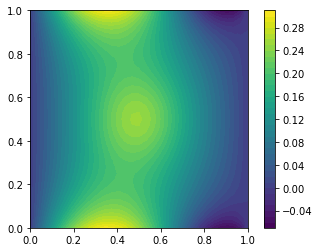

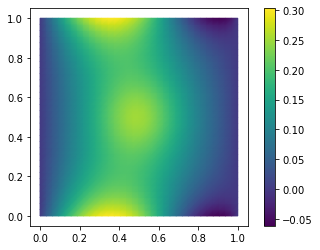

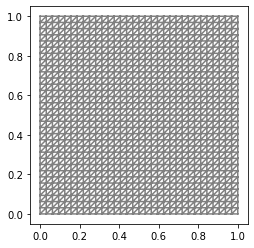

In [72]:
# Save solution in VTK format
file = File("poisson/poisson.pvd")
file << u

# plot solution
# import matplotlib to plot over and above "plot" from FEniCS
%matplotlib inline
import matplotlib.pyplot as plt

# Contour-Color plot
c = plot(u)
plt.colorbar(c)
plt.show()

# Heat Map
plt.figure()
c = plot(u, mode='color')
plt.colorbar(c)
plt.show()

plot(mesh)

#### Example-2: [Demo-2](https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft01_poisson.py)

In this demo, it is seen that we have a solution of the form:

$$u(x,y) = 1 + x^2 + 2 y^2.$$

The Laplace equation $-\nabla^2 u(x,y) = f(x,y)$ implies that $f(x,y) = -6$. Now, what are the boundary conditions? 

On the boundary:

$$u = u_D \mbox{ on } \Gamma_D$$.

Hence, $u_D = 1 + x^2 + 2y^2$. This is called as the method of Manufactured Solution. 

error_L2  = 0.0005146936295757081
error_max = 2.220446049250313e-14
norm = 2.10818510677892


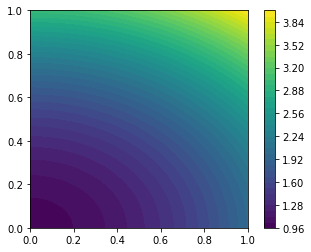

In [5]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.
  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary
  u_D = 1 + x^2 + 2y^2
    f = -6
"""

from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(32, 32)
V = FunctionSpace(mesh, 'P', 1)

# The exact solution
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
c = plot(u)
plt.colorbar(c)
#plot(mesh)

# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')
norm_L2 = norm(u_D, 'L2', mesh)

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)
print('norm =', norm_L2)

# Hold plot
plt.show()

__How does one obtain the flux__?

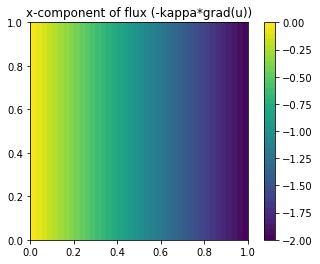

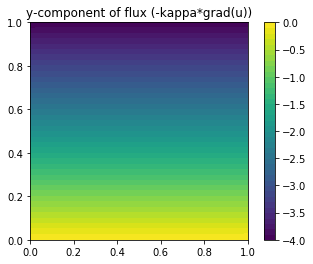

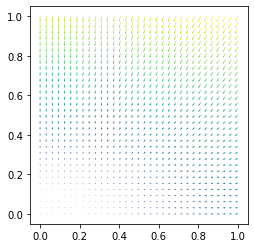

In [6]:
# Get the flux
V = u.function_space()
mesh = V.mesh()
degree = V.ufl_element().degree()
W = VectorFunctionSpace(mesh, 'P', degree)
grad_u = project(grad(u), W)
flux_u = project(-grad(u), W)

plot(flux_u, title='flux field')
flux_x, flux_y = flux_u.split(deepcopy=True)  # extract components
c = plot(flux_x, title='x-component of flux (-kappa*grad(u))')
plt.colorbar(c)
plt.show()

plt.figure()
c = plot(flux_y, title='y-component of flux (-kappa*grad(u))')
plt.colorbar(c)
plt.show()

plt.figure()
c = plot(flux_u)
c.autoscale()
plt.show()

**Example-3**: Now, we will make use of this [demo](https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft02_poisson_membrane.py) to understand the deformation of a membrane under the influence of an eccentric load

This problem is purely a Dirichlet BC problem.

In [10]:
y

array([-9.99000000e-01, -9.79020000e-01, -9.59040000e-01, -9.39060000e-01,
       -9.19080000e-01, -8.99100000e-01, -8.79120000e-01, -8.59140000e-01,
       -8.39160000e-01, -8.19180000e-01, -7.99200000e-01, -7.79220000e-01,
       -7.59240000e-01, -7.39260000e-01, -7.19280000e-01, -6.99300000e-01,
       -6.79320000e-01, -6.59340000e-01, -6.39360000e-01, -6.19380000e-01,
       -5.99400000e-01, -5.79420000e-01, -5.59440000e-01, -5.39460000e-01,
       -5.19480000e-01, -4.99500000e-01, -4.79520000e-01, -4.59540000e-01,
       -4.39560000e-01, -4.19580000e-01, -3.99600000e-01, -3.79620000e-01,
       -3.59640000e-01, -3.39660000e-01, -3.19680000e-01, -2.99700000e-01,
       -2.79720000e-01, -2.59740000e-01, -2.39760000e-01, -2.19780000e-01,
       -1.99800000e-01, -1.79820000e-01, -1.59840000e-01, -1.39860000e-01,
       -1.19880000e-01, -9.99000000e-02, -7.99200000e-02, -5.99400000e-02,
       -3.99600000e-02, -1.99800000e-02,  1.11022302e-16,  1.99800000e-02,
        3.99600000e-02,  

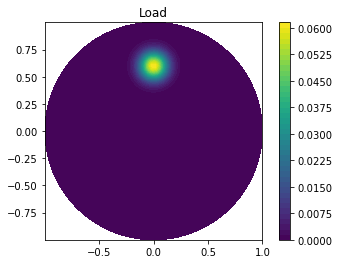

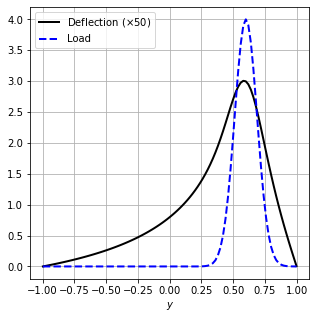

In [12]:
"""
FEniCS tutorial demo program: Deflection of a membrane.
  -Laplace(w) = p  in the unit circle
            w = 0  on the boundary
The load p is a Gaussian function centered at (0, 0.6).
"""

from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt

# Create mesh and define function space
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 2)

# Define boundary condition
w_D = Constant(0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

# Define load
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',
               degree=1, beta=beta, R0=R0)

# Define variational problem
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

# Compute solution
w = Function(V)
solve(a == L, w, bc)

# Plot solution
import matplotlib.pyplot as plt
p = interpolate(p, V)

c = plot(w, title='Deflection')

plot(p, title='Load')
plt.colorbar(c)
plt.show()
# Save solution to file in VTK format
vtkfile_w = File('poisson_membrane/deflection.pvd')
vtkfile_w << w
vtkfile_p = File('poisson_membrane/load.pvd')
vtkfile_p << p

# Curve plot along x = 0 comparing p and w
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
tol = 0.001  # avoid hitting points outside the domain


y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y]  # 2D points
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])
plt.plot(y, 50*w_line, 'k', linewidth=2)  # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')
plt.savefig('poisson_membrane/curves.pdf')
plt.savefig('poisson_membrane/curves.png')

# Hold plots
#interactive()
plt.show()

In [15]:
w(0,0.99)

0.0012460571943381969

Note that, by using `mshr` libraries, we can create more complex geometries and meshes.

You can also install [vtkplotter](https://github.com/marcomusy/vtkplotter) using the command:

`pip install -U vtkplotter`

and 

`pip install k3d`

and then use it as follows:

#### Problem 8.4 from Fish and Belytschko

In this example, we consider a manufactured solution of the form

$$T = (r-a)^2 = x^2 + y^2 - 2a\sqrt{x^2 + y^2} + a^2$$

defined over the domain of a square plate with a hole as shown in the Figure below. 

<img src="Figures/PlateHole.png" width="400"/>

__Figure:__ A square plate with a hole, with prescribed temperature at $x = \pm b$ and prescribed flux at $y = \pm b$.

For heat equation with isotropic conductivity and $k = 1$, the corresponding source term that satisfies the Laplace equation is given by

$$s = -\nabla^2 T = 2a \frac{1}{\sqrt{x^2 + y^2}}-4 $$.

The essential boundary conditions on $T_\Gamma$ are

$$T(r = a) = 0, T(x = \pm b, y) = a^2 + b^2 + y^2 - 2a\sqrt{y^2 + b^2} $$.

The natural boundary conditions on $T_q$ are ($\bar{q} = -k {\mathbf n}^T \nabla T$)

\begin{align}
\bar{q}(x, y=b) &= -\frac{\partial T}{\partial y}(x, y = b) = 2b\left ( \frac{a}{\sqrt{x^2 + b^2}} -1\right)\\
\bar{q}(x, y=-b) &= -\frac{\partial T}{\partial y}(x, y = -b) = 2b\left ( \frac{a}{\sqrt{x^2 + b^2}}-1\right)
\end{align}

Solve the problem using the finite element method to obtain the field $T(x,y)$ for different mesh sizes and compare the resulting solution with the exact solution. 

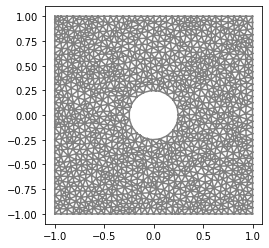

In [17]:
# Importing libraries
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

# Generating geometry
ret = Rectangle(Point(-1,-1), Point(1,1))
circ = Circle(Point(0.,0.),0.25)

# Define domain and resolution
domain = ret - circ
res = 30

# Generate mesh
%matplotlib inline
mesh = generate_mesh(domain, res)
plot(mesh)

# degree of the polynomial
deg = 1

In [19]:
# Create classes for defining parts of the boundaries and the interior
# of the domain
b = 1.0;
a = 0.25;

class Left(SubDomain):
    def __init__(self, a, b):
        SubDomain.__init__(self)
        self.a = a
        self.b = b
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] + self.b) < DOLFIN_EPS
    
class Right(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(x[0] - b) < DOLFIN_EPS
    
class Top(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(b - x[1]) < DOLFIN_EPS
    
class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(b + x[1]) < DOLFIN_EPS
    
class Hole(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and abs(sqrt(x[0]*x[0] + x[1]*x[1])-a) < DOLFIN_EPS
    

# Initialize sub-domain instances
top = Top()
bottom = Bottom()
right = Right()
left = Left(a, b)
hole = Hole()

In [20]:
# Initialize mesh function for boundary domains
boundaries = MeshFunction('size_t', mesh, mesh.topology().dim()-1)
boundaries.set_all(0)
top.mark(boundaries, 1)
bottom.mark(boundaries, 2)
right.mark(boundaries, 3)
left.mark(boundaries, 4)
hole.mark(boundaries, 5)

In [21]:
# Define input data
s = Expression("2.*a/sqrt(x[0]*x[0] + x[1]*x[1]) - 4.", a = 0.25, degree=deg)
Tlr = Expression("a*a + b*b + x[1]*x[1] - 2*a*sqrt(x[1]*x[1] + b*b)", a = 0.25, b = 1., degree=deg)
qtb = Expression("2*b*(a/sqrt(x[0]*x[0] + b*b) - 1.)", a = 0.25, b = 1., degree = deg)
#qbottom = Expression("2*b*(1. - 2*a/sqrt(x[0]*x[0] + x[1]*x[1]))", a = 0.25, b = 1., degree=deg)

In [22]:
# Define function space and basis functions
V = FunctionSpace(mesh, "CG", deg)
u = TrialFunction(V)
v = TestFunction(V)

In [23]:
# Define Dirichlet boundary conditions at top and bottom boundaries
bcs = [DirichletBC(V, Tlr, boundaries, 3),
       DirichletBC(V, Tlr, boundaries, 4)]

In [24]:
# Define new measures associated with the exterior boundaries
ds = Measure('ds', subdomain_data=boundaries)

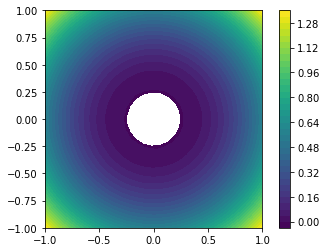

In [25]:
# Define variational form
L = -qtb*v*ds(1) - qtb*v*ds(2) + s*v*dx 
a = inner(grad(u), grad(v))*dx 

# Solve problem
uu = Function(V)
solve(a == L, uu, bcs)
c = plot(uu)
plt.colorbar(c)
plt.show()

Now checking the error in the solution

In [26]:
u_exact = Expression("x[0]*x[0] + x[1]*x[1] - 2*a*sqrt(x[0]*x[0]+x[1]*x[1]) + pow(a,2)", a = 0.25, degree = 6 )
L2_error = errornorm(u_exact, uu, 'L2')
L2_norm = norm(u_exact, 'L2', mesh)
# max error
vertex_values_u_exact = u_exact.compute_vertex_values(mesh)
vertex_values_u = uu.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_exact - vertex_values_u))

print("L2_error is = ", L2_error)
print("L2_norm is = ", L2_norm)
print("Max error is ", error_max)
print("Percentage error is ", L2_error/L2_norm*100)

L2_error is =  0.0011389546676142438
L2_norm is =  0.8969061754419492
Max error is  0.0020264086729968227
Percentage error is  0.12698704711816994


Text(0, 0.5, '$T(x, 0.5)$')

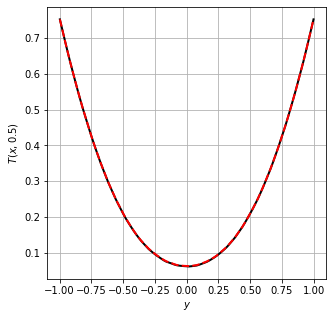

In [27]:
# Make a plot
import numpy as np
u_exact_V = interpolate(u_exact, V)
plt.figure(figsize=(5,5))
tol = 0.001  # avoid hitting points outside the domain
x = np.linspace(-1 + tol, 1 - tol, 101)
points = [(x_, 0.5) for x_ in x]  # 2D points
uu_line = np.array([uu(point) for point in points])
u_exact_line = np.array([u_exact_V(point) for point in points])
plt.plot(x, uu_line, 'k', linewidth=2)  # magnify w
plt.plot(x, u_exact_line, 'r--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.ylabel('$T(x, 0.5)$')

Now, obtaining the flux

In [28]:
V = uu.function_space()
mesh = V.mesh()
degree = V.ufl_element().degree()
W = VectorFunctionSpace(mesh, 'P', degree)
grad_u = project(grad(uu), W)
flux_u = project(-grad(uu), W)

# get the exact flux
grad_u_exact = f2 = Expression(("2*x[0]*(1-a/sqrt(x[0]*x[0] + x[1]*x[1]))","2*x[1]*(1-a/sqrt(x[0]*x[0] + x[1]*x[1]))")\
                               , a = 0.25, b = 1, degree=5)
#plot(interpolate(f2, W))

#u_exact_P = project(u_exact, V)
# get the errornorm
L2_flux_error = errornorm(grad_u_exact, grad_u, 'L2')
L2_norm = norm(grad_u_exact, 'L2', mesh)
print("L2_flux_error is = ", L2_flux_error)
print("L2_norm is = ", L2_norm)
print("% error is = ", L2_flux_error/L2_norm*100)
#L2_norm = norm(u_exact_V, 'L2')
#L2_norm2 = norm(u_exact, 'L2', mesh)
#L2_norm3 = norm(u_exact_P, 'L2')
#print(L2_norm, L2_norm2, L2_norm3)

L2_flux_error is =  0.0167753095707835
L2_norm is =  2.3530660300648494
% error is =  0.7129128276235062


### Solving the Example 8.3 problem from Fish and Belytschko using subdomains

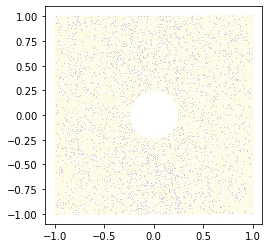

In [ ]:
# Importing libraries
from dolfin import *
from mshr import *

# Generating geometry
ret = Rectangle(Point(0,0), Point(2,1))
circ = Circle(Point(0.5,1),0.15)
tri = Polygon([Point(0,0), Point(2, 0), Point(2, 0.5)])

# Define domain and resolution
domain = ret - tri
res = 30

# Generate mesh
%matplotlib inline
mesh = generate_mesh(domain, res)
plot(mesh)

In [ ]:
# Create classes for defining parts of the boundaries and the interior
# of the domain
class Right(SubDomain):
    def inside(self, x, on_boundary):
        return 2 - x[0] < DOLFIN_EPS
    
class Top(SubDomain):
    def inside(self, x, on_boundary):
        return 1 - x[1] < DOLFIN_EPS

class Dboundary(SubDomain):
    def inside(self, x, on_boundary):
        return x[0] < DOLFIN_EPS or x[1] - 0.25*x[0] < DOLFIN_EPS

# Initialize sub-domain instances
top = Top()
right = Right()
D_BC = Dboundary()

In [ ]:
# Initialize mesh function for boundary domains
boundaries = MeshFunction('size_t', mesh, 1)
boundaries.set_all(0)
top.mark(boundaries, 1)
right.mark(boundaries, 2)
D_BC.mark(boundaries, 3)

In [ ]:
# Define input data
s = Constant(5.0)
tb = Constant(0.0)
q1 = Constant(20.0)
q2 = Constant(0.0)

In [ ]:
# Define function space and basis functions
V = FunctionSpace(mesh, "CG", 2)
u = TrialFunction(V)
v = TestFunction(V)

In [ ]:
# Define Dirichlet boundary conditions at top and bottom boundaries
bcs = DirichletBC(V, tb, boundaries, 3)

In [ ]:
# Define new measures associated with the exterior boundaries
ds = Measure('ds', subdomain_data=boundaries)

In [ ]:
# Define variational form
L = -q1*v*ds(1) - q2*v*ds(2) -  s*v*dx 
a = inner(grad(u), grad(v))*dx 

# Solve problem
u = Function(V)
solve(a == L, u, bcs)

In [ ]:
plot(u)

In [ ]:
import numpy as np
x = np.linspace(0, 1, 100)
T = np.zeros(len(x))
i = 0
for X in x:
    #Y = X/4.
    Y = 0.7
    T[i] = u(X, Y)
    i = i + 1
    
import matplotlib.pyplot as plt
plt.plot(x, T)
plt.xlabel('x')
plt.ylabel('Temperature')

In [ ]:
# Get the flux
V = u.function_space()
mesh = V.mesh()
degree = V.ufl_element().degree()
W = VectorFunctionSpace(mesh, 'P', degree)
grad_u = project(grad(u), W)
flux_u = project(-grad(u), W)

plot(flux_u, title='flux field')
flux_x, flux_y = flux_u.split(deepcopy=True)  # extract components
#file << flux_x
#file << flux_y
plot(flux_x, title='x-component of flux (-kappa*grad(u))')
plot(flux_y, title='y-component of flux (-kappa*grad(u))')
plot(flux_u)

In [ ]:
import numpy as np
x = np.linspace(0, 2, 100)
Y = 1
jy = np.zeros(len(x))
i = 0
for X in x:
    #Y = X/4.
    jy[i] = flux_y(X, Y)
    i = i + 1
    
import matplotlib.pyplot as plt
plt.plot(x, jy)
plt.xlabel('x')
plt.ylabel('Flux Y')  

In [ ]:
import numpy as np
y = np.linspace(0.5, 1, 50)
X = 2
jx = np.zeros(len(y))
i = 0
for Y in y:
    #Y = X/4.
    jx[i] = flux_x(X, Y)
    i = i + 1
    
import matplotlib.pyplot as plt
plt.plot(y, jx)
plt.xlabel('y')
plt.ylabel('Flux X') 

## Plotting on a donut

In [ ]:
import numpy as np
from fenics import *
from mshr import *
%config InlineBackend.figure_format='retina'

from matplotlib import pyplot as plt
import sys

r0 = 0.7
r1 = 1.0
Nr = 5

mesh=generate_mesh(Circle(Point(0,0),r1)-Circle(Point(0,0),r0), Nr)
V = FunctionSpace(mesh, "DG",0)
Vvec = VectorFunctionSpace(mesh, "DG",0)
xmesh = V.tabulate_dof_coordinates()[:,0]
ymesh = V.tabulate_dof_coordinates()[:,1]

rvec = Expression(("x[0]/sqrt(x[0]*x[0]+x[1]*x[1])",
    "x[1]/sqrt(x[0]*x[0]+x[1]*x[1])"),element = Vvec.ufl_element())
r_project = np.reshape( project(rvec, Vvec).vector()[:],(47,2))
r_direct = np.asarray([[x/np.sqrt(x**2+y**2),y/np.sqrt(x**2+y**2)] for x,y in zip(xmesh,ymesh)])
plot(mesh)
plt.scatter(xmesh,ymesh)
plt.quiver(xmesh, ymesh, r_project[:,0], r_project[:,1],label="Projection")
plt.quiver(xmesh, ymesh, r_direct[:,0], r_direct[:,1],label="Manual",color='r',pivot='tip')
plot(project(rvec, Vvec))
plt.legend()
plt.savefig("donut.png")
plt.show()

## Patch test for FEA

The patch test is done for the simple mesh created as below. To create your own mesh do the following.

In [47]:
import dolfin as df
import matplotlib.pyplot as plt
import mshr

%matplotlib inline
mesh = df.Mesh()
editor = df.MeshEditor()
editor.open(mesh, 'triangle', 2, 2)
editor.init_vertices(5)
editor.init_cells(4)

In [48]:
# add vertices
editor.add_vertex(0, np.array([0.0, 0.0]))
editor.add_vertex(1, np.array([1.0, 0.0]))
editor.add_vertex(2, np.array([0.75, 0.25]))
editor.add_vertex(3, np.array([1.0, 1.0]))
editor.add_vertex(4, np.array([0.0, 1.0]))

In [49]:
# add cells
editor.add_cell(0, np.array([0, 1, 2], dtype=np.uintp))
editor.add_cell(1, np.array([2, 1, 3], dtype=np.uintp))
editor.add_cell(2, np.array([2, 3, 4], dtype=np.uintp))
editor.add_cell(3, np.array([2, 4, 0], dtype=np.uintp))

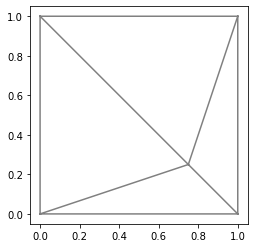

In [51]:
# final formalities
editor.close()
mesh.order
df.plot(mesh)

Define Laplace equation. The exact solution is:

$$\theta = \alpha_0 + \alpha_1 x + \alpha_2 y$$,

we define $\alpha_0 = 1, \alpha_1 = 2, \alpha_2 = 3$

L2_error is =  3.624438086253896e-16


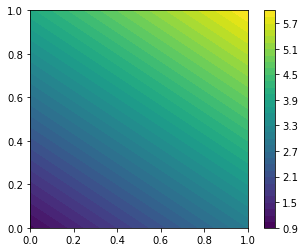

In [55]:
V = FunctionSpace(mesh, 'P', 1)

# The exact solution
u_D = Expression('a0 + a1*x[0] + a2*x[1]', a0 = 1, \
                 a1 = 2, a2 = 3, degree=1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
c = plot(u)
plt.colorbar(c)
#plot(mesh)

print("L2_error is = ", errornorm(u_D, u, 'L2'))